# Clean pe_contratos


### Goals
- Como unir contratos_pe com detalhes_pe? [numerocontrato, codigopl]

-Fazer a comparação de valores recebidos em base contratos e base licitações 

-Fazer comparação entre numero de contratos com dispensa de licitação em sca_licitacoesdetalhes e em contratos 

-Há discrepância entre número de licitações ganha por empresa x e número de contratos assinados? 

-O que fazer com Pessoas Físicas em sca_licitacoesdetalhes?

-Integridade de base sca_contrataos detalhes para variável número de licitantes (e.g. CONSTA 0 e teve vários – controlando para a possibilidade de que a respectiva licitação tenha sido revogada) 


### Query

```CREATE TABLE analise_corrupcao_cluster.pe_contratos AS (
  SELECT *
  FROM br_gov_despesas_municipais_tce_pe_contratos.contratos
  WHERE numerodocumentoajustado !~ '[A-Z]+|,')
  ```

### Results

 The fields that are most importants, for know, are the key ones **numerodocumentoajustado** and **codigoug** because they are necessary to bind data with different tables.
 
 Everything seems normal. The correlation between fields also seem fine.
 
 As usual, there are few companies that share most of the contracts. I did not get the proportions, but this is a interesting investigations topic.

### Methodology

In [148]:
from sqlalchemy import create_engine
import pandas as pd
import copy
import seaborn as sns


pd.options.display.max_columns = 999

import yaml
con_link = yaml.load(open('db_links.yaml', 'r'))['postgre']
con = create_engine(con_link)

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 12)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
contratos = pd.read_sql_query('SELECT * FROM analise_corrupcao_cluster.pe_contratos', con)

In [4]:
detalhes = pd.read_sql_query('SELECT * FROM analise_corrupcao_cluster.sca_licitacoesdetalhes', con)

In [5]:
contratos = contratos.reset_index()
contratos.head(2)

,index,unidadegestora,esfera,municipio,anocontrato,cpf_cnpj,tipodocumento,numerodocumento,numerodocumentoajustado,razaosocial,vigencia,objeto,valorcontrato,estagiocontrato,situacaocontrato,siglaug,codigoug,codigoefiscoug,codigoaudinug,tipoprocesso,numeroprocesso,anoprocesso,portariacomissaolicitacao,linkarquivo,numerocontrato
0,0,Tribunal de Contas do Estado de Pernambuco,E,Recife,2010,020.618.434-41,CPF,020.618.434-41,02061843441,MARIA DE FATIMA WAECHTER FINIZOLA ...,01/12/2010 a 28/02/2011,3.117 CONSULTORIA,24733.33,Fim de Vigência,Regular,TCE/PE,780,020001,999.004,None,None,None,None,None,079
1,1,Tribunal de Contas do Estado de Pernambuco,E,Recife,2008,00.028.986/0001-08,CNPJ,00.028.986/0001-08,00028986000108,ELEVADORES ATLAS SCHINDLER S/A ...,03/12/2008 a 02/12/2009,2.010 MANUTENÇÃO E CONSERVAÇÃO DE BENS IMÓVEIS,24000.00,Fim de Vigência,Regular,TCE/PE,780,020001,999.004,None,None,None,None,None,076


In [6]:
print('Número de entradas na tabela: ', len(contratos))

Número de entradas na tabela:  119827


In [7]:
detalhes = detalhes.reset_index()
detalhes.head(2)

,index,numerodocumentoajustado,codigopl,codigoug,ug,nomenatureza,nomemodalidade,numeromodalidade,anomodalidade,descricaoobjeto,especificacaoobjeto,situacaolicitacao,estagiolicitacao,adjudicada,qtdelicitantes,codigomodalidade,numeroprocesso,anoprocesso,caracteristicaobjeto,objetoconformeedital,razaosocial,datapublicacaohomologacao,totaladjudicadolicitacao,resultadohabilitacao,dataemissaoedital,datapublicacaohabilitacao,totaladjudicadolicitante
0,0,0,1703.0,623.0,Prefeitura Municipal de São Vicente Férrer,Compras,Pregão Presencial,10,2009.0,MEDICAMENTOS,MEDICAMENTOS OU COMPONENTES DESTINADOS À MANIP...,Em Andamento,Processo Instaurado,Não Vencedor,0.0,9.0,65,2009.0,Por Lotes,MEDICAMENTOS OU COMPONENTES DESTINADOS À MANIP...,None,None,NaN,None,None,None,NaN
1,1,0,199.0,341.0,Prefeitura Municipal de Joaquim Nabuco,Outros Serviços,Inexigibilidade,4,2009.0,SERVIÇOS PRESTADOS POR PROFISSIONAL DO SETOR A...,"CONTRATAÇÃO DE CANTORES, PINTORES, POETAS, ART...",Em Andamento,Processo Instaurado,Não Vencedor,0.0,11.0,20,2009.0,Integral com Itens,"CONTRATAÇÃO DE CANTORES, PINTORES, POETAS, ART...",None,None,NaN,None,None,None,NaN


In [8]:
print('Número de entradas na tabela: ', len(detalhes))
print('Número de vencedores: ', len(detalhes[detalhes['adjudicada'] == 'Vencedor']))

Número de entradas na tabela:  368522
Número de vencedores:  158252


In [17]:
contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119827 entries, 0 to 119826
Data columns (total 25 columns):
index                        119827 non-null int64
unidadegestora               119827 non-null object
esfera                       119827 non-null object
municipio                    119827 non-null object
anocontrato                  119827 non-null object
cpf_cnpj                     119827 non-null object
tipodocumento                119827 non-null object
numerodocumento              119827 non-null object
numerodocumentoajustado      119827 non-null object
razaosocial                  119827 non-null object
vigencia                     119827 non-null object
objeto                       119827 non-null object
valorcontrato                119827 non-null float64
estagiocontrato              119827 non-null object
situacaocontrato             119827 non-null object
siglaug                      115064 non-null object
codigoug                     119827 non-null object
codig

In [18]:
detalhes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368522 entries, 0 to 368521
Data columns (total 27 columns):
index                        368522 non-null int64
numerodocumentoajustado      368522 non-null object
codigopl                     368522 non-null float64
codigoug                     368522 non-null float64
ug                           368522 non-null object
nomenatureza                 368403 non-null object
nomemodalidade               368522 non-null object
numeromodalidade             368522 non-null object
anomodalidade                368522 non-null float64
descricaoobjeto              368522 non-null object
especificacaoobjeto          368522 non-null object
situacaolicitacao            368522 non-null object
estagiolicitacao             368522 non-null object
adjudicada                   368522 non-null object
qtdelicitantes               368522 non-null float64
codigomodalidade             368522 non-null float64
numeroprocesso               368522 non-null object
a

## Número de numerodocumentoajustado de contratos que aparecem na detalhes filtrada por vencedor e situacaolicitacao

In [26]:
d = detalhes[(detalhes['situacaolicitacao'] == 'Em Andamento') | (detalhes['situacaolicitacao'] == 'Concluído')]
detalhes_filtrada = d[d['adjudicada'] == 'Vencedor']
print('Número de linhas da detalhes_filtrada: ', len(detalhes_filtrada))

Número de linhas da detalhes_filtrada:  158193


In [30]:
docs_detalhes_filtrada = detalhes_filtrada['numerodocumentoajustado'].unique()
print('Número de documentos únicos da detalhes_filtrada: ', len(docs_detalhes_filtrada))

Número de documentos únicos da detalhes_filtrada:  25634


In [32]:
docs_contratos = contratos['numerodocumentoajustado'].unique()
print('Número de documentos únicos da contratos: ', len(docs_contratos))

Número de documentos únicos da contratos:  30315


In [34]:
print('Diferença no número de documentos (contratos - detalhes): ',  len(docs_contratos) - len(docs_detalhes_filtrada))

Diferença no número de documentos (contratos - detalhes):  4681


In [37]:
print('Existem {} documentos na interseção de contratos e detalhes'.format(len(set(docs_contratos).intersection(docs_detalhes_filtrada))))

Existem 14292 documentos na interseção de contratos e detalhes


Os possíveis problemas são:
- Erro na captura
- Erro na base do TCE
- Problema no filtro preliminar dos dados 
- Nem todos os contratos decorrem de uma licitação

#### Problema no filtro preliminar dos dados

In [38]:
detalhes_raw = pd.read_sql_query('SELECT * FROM br_gov_despesas_municipais_tce_pe_licitacoes.sca_licitacoesdetalhes', con)

In [39]:
contratos_raw = pd.read_sql_query('SELECT * FROM br_gov_despesas_municipais_tce_pe_contratos.contratos', con)

In [40]:
d_raw = detalhes_raw[(detalhes_raw['situacaolicitacao'] == 'Em Andamento') | (detalhes_raw['situacaolicitacao'] == 'Concluído')]
detalhes_filtrada_raw = d_raw[d_raw['adjudicada'] == 'Vencedor']
print('Número de linhas da detalhes_filtrada_raw: ', len(detalhes_filtrada_raw))

Número de linhas da detalhes_filtrada_raw:  158226


In [41]:
docs_detalhes_filtrada_raw = detalhes_filtrada_raw['numerodocumentoajustado'].unique()
print('Número de documentos únicos da detalhes_filtrada: ', len(docs_detalhes_filtrada_raw))

Número de documentos únicos da detalhes_filtrada:  25662


In [42]:
docs_contratos_raw = contratos_raw['numerodocumentoajustado'].unique()
print('Número de documentos únicos da contratos_raw: ', len(docs_contratos_raw))

Número de documentos únicos da contratos_raw:  30328


In [43]:
print('Diferença no número de documentos (contratos - detalhes): ',  len(docs_contratos_raw) - len(docs_detalhes_filtrada_raw))

Diferença no número de documentos (contratos - detalhes):  4666


In [44]:
print('Existem {} documentos na interseção de contratos_raw e detalhes_raw'.format(len(set(docs_contratos_raw).intersection(docs_detalhes_filtrada_raw))))

Existem 0 documentos na interseção de contratos_raw e detalhes_raw


Não é um problema do filtro pois as proporções são muito semelhantes

Os possíveis problemas são:
X Problema no filtro preliminar dos dados 
- Erro na captura
- Erro na base do TCE
- Nem todos os contratos decorrem de uma licitação

## Erro na Captura

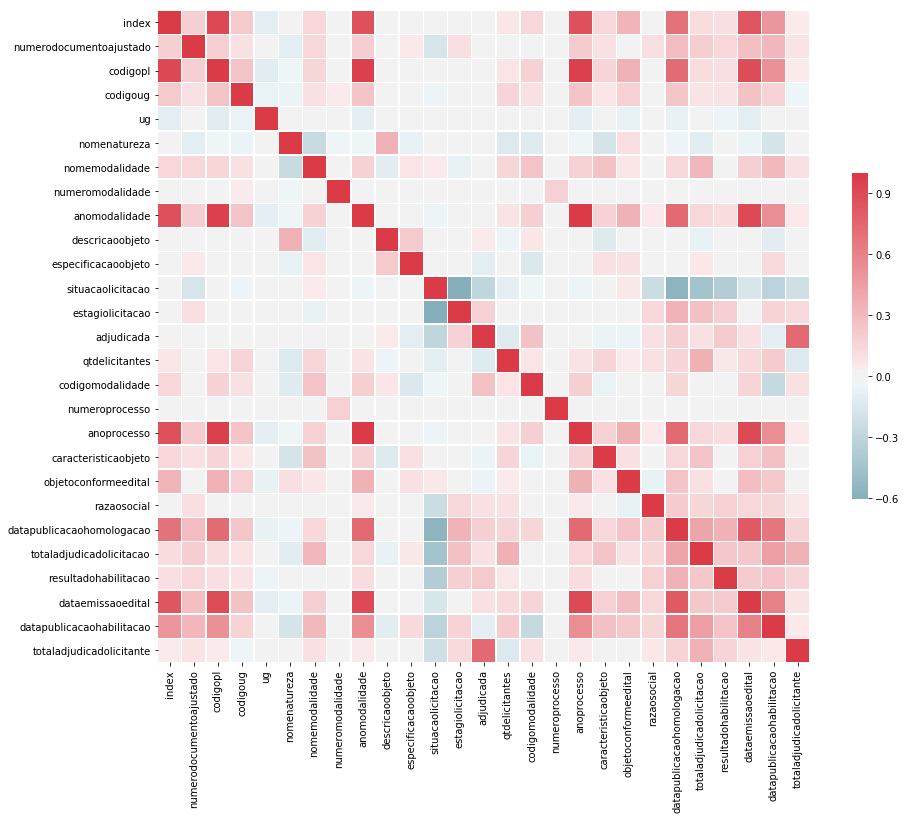

In [46]:
full_numeric = detalhes

for col in detalhes.columns:
    
    full_numeric[col] = full_numeric[col].astype("category").cat.codes
    
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = full_numeric.corr()
sns.heatmap(corr, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [112]:
detalhes_ug = detalhes_raw.groupby(['codigoug']).count()['numerodocumentoajustado']
print('Número de códigos ug detalhes: ',len(detalhes_ug))

Número de códigos ug detalhes:  565


In [113]:
contratos_ug = contratos_raw.groupby(['codigoug']).count()['numerodocumentoajustado']
print('Número de códigos ug: ',len(contratos_ug))

Número de códigos ug:  891


In [93]:
contratos_ug = contratos_ug.to_frame().reset_index().astype(int)['codigoug']

In [94]:
detalhes_ug = detalhes_ug.to_frame().reset_index().astype(int)['codigoug']

In [97]:
print('Intersecção dos códigos ug:',  len(set(contratos_ug.values).intersection(detalhes_ug.values)))

Intersecção dos códigos ug: 546


In [98]:
lista_ug = set(contratos_ug.values).intersection(detalhes_ug.values)

In [101]:
detalhes_ug_nomes = detalhes_raw[detalhes_raw['codigoug'].isin(lista_ug)]['ug']
detalhes_ug_nomes.head()

0    Prefeitura Municipal de São Vicente Férrer
1        Prefeitura Municipal de Joaquim Nabuco
2               Prefeitura Municipal de Amaraji
3               Prefeitura Municipal de Amaraji
4            Prefeitura Municipal de Chã Grande
Name: ug, dtype: object

In [107]:
contratos_raw['codigoug'] = contratos_raw['codigoug'].astype(int)
contratos_raw[contratos_raw['codigoug'].isin(lista_ug)]['siglaug'].head()

0    TCE/PE
1    TCE/PE
2    TCE/PE
3    TCE/PE
4    TCE/PE
Name: siglaug, dtype: object

In [118]:
len(contratos_raw['unidadegestora'].unique())

891

In [119]:
len(detalhes_raw['ug'].unique())

565

In [128]:
contratos_ug = contratos_raw.groupby(['unidadegestora','codigoug']).count().reset_index().sort_values(by='codigoug')[['unidadegestora','codigoug','esfera']]

In [138]:
detalhes_ug = detalhes_filtrada_raw.groupby(['ug', 'codigoug']).count().reset_index().sort_values(by='codigoug')[['ug','codigoug','razaosocial']]

In [142]:
merge = contratos_ug.merge(detalhes_ug, on='codigoug', how='outer').rename(columns={'esfera':'count_contratos',
                                                                                    'razaosocial':'count_detalhes',
                                                                                    'ug': 'ug_detalhes',
                                                                                   'unidadegestora':'ug_contratos'})
merge = merge.set_index('codigoug')
merge['diff'] = abs(merge['count_contratos'] - merge['count_detalhes'])
merge['prop'] = merge['count_contratos'] / merge['count_detalhes']
merge.sort_values(by='diff', ascending=False)

,ug_contratos,count_contratos,ug_detalhes,count_detalhes,diff,prop
codigoug,,,,,,
319.0,Prefeitura Municipal do Jaboatão dos Guararapes,73.0,Prefeitura Municipal do Jaboatão dos Guararapes,3118.0,3045.0,0.023412
563.0,Prefeitura Municipal de Salgueiro,483.0,Prefeitura Municipal de Salgueiro,3357.0,2874.0,0.143878
1027.0,Secretaria de Saúde de Pernambuco,658.0,Secretaria de Saúde de Pernambuco,3219.0,2561.0,0.204411
109.0,Prefeitura Municipal de Buenos Aires,2371.0,Prefeitura Municipal de Buenos Aires,382.0,1989.0,6.206806
172.0,Prefeitura Municipal de Caruaru,621.0,Prefeitura Municipal de Caruaru,2557.0,1936.0,0.242863
1140.0,Hospital Agamenon Magalhães,40.0,Hospital Agamenon Magalhães,1947.0,1907.0,0.020544
988.0,Secretaria de Administração de Pernambuco,146.0,Secretaria de Administração de Pernambuco,1968.0,1822.0,0.074187
816.0,Instituto Agronômico de Pernambuco,380.0,Instituto Agronômico de Pernambuco,2078.0,1698.0,0.182868
471.0,Prefeitura Municipal de Petrolina,1090.0,Prefeitura Municipal de Petrolina,2753.0,1663.0,0.395932


In [143]:
merge.to_csv('merge_ug.csv')

# Como unir contratos_pe com detalhes_pe? [numerocontrato, codigopl]

In [19]:
key = detalhes[detalhes['adjudicada'] == 'Vencedor'][['numerodocumentoajustado', 'anomodalidade', 'codigoug', 'totaladjudicadolicitante']]

In [20]:
key_unique = key.groupby(['numerodocumentoajustado', 'anomodalidade', 'codigoug']).count().sort_values('totaladjudicadolicitante', ascending=False)

In [21]:
repetidos = len(key_unique[key_unique['totaladjudicadolicitante'] > 1])
total = len(key_unique)
print('{}% das entradas são repetidas de {}'.format(repetidos/total*100, total))

22.242720336704707% das entradas são repetidas de 107869


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc353d67470>]], dtype=object)

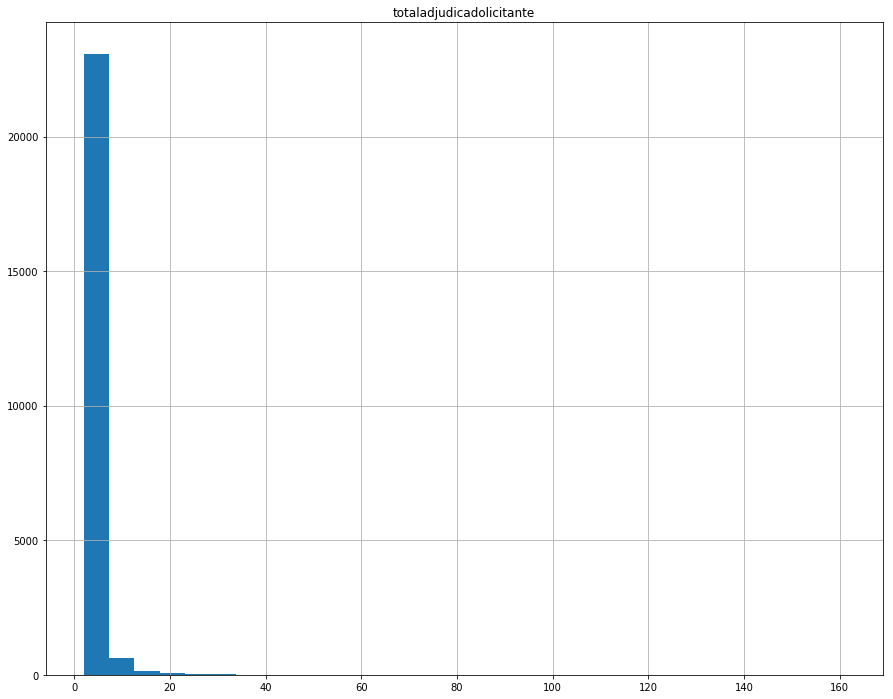

In [22]:
key_unique[key_unique['totaladjudicadolicitante'] > 1].hist(bins=30)

In [23]:
repetidas = key_unique[key_unique['totaladjudicadolicitante'] > 1]
repetidas['foo'] = 1
repetidas.groupby('totaladjudicadolicitante').count()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,foo
totaladjudicadolicitante,
2,14218
3,4759
4,2139
5,980
6,599
7,391
8,244
9,145
10,106


### Vamos ver se é possível juntar as não repetidas por enquanto

In [15]:
nao_repetidas = key_unique[key_unique['totaladjudicadolicitante'] == 1].reset_index()
nao_repetidas = nao_repetidas.merge(detalhes[detalhes['adjudicada'] == 'Vencedor'], on=['numerodocumentoajustado','codigoug','anomodalidade'])

key_contratos = contratos[['numerodocumentoajustado', 'codigoug', 'anocontrato', 'valorcontrato']]

In [16]:
nao_repetidas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83876 entries, 0 to 83875
Data columns (total 28 columns):
numerodocumentoajustado       83876 non-null object
anomodalidade                 83876 non-null float64
codigoug                      83876 non-null float64
totaladjudicadolicitante_x    83876 non-null int64
index                         83876 non-null int64
codigopl                      83876 non-null float64
ug                            83876 non-null object
nomenatureza                  83876 non-null object
nomemodalidade                83876 non-null object
numeromodalidade              83876 non-null object
descricaoobjeto               83876 non-null object
especificacaoobjeto           83876 non-null object
situacaolicitacao             83876 non-null object
estagiolicitacao              83876 non-null object
adjudicada                    83876 non-null object
qtdelicitantes                83876 non-null float64
codigomodalidade              83876 non-null float64
nume

In [17]:
key_contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119827 entries, 0 to 119826
Data columns (total 4 columns):
numerodocumentoajustado    119827 non-null object
codigoug                   119827 non-null object
anocontrato                119827 non-null object
valorcontrato              119827 non-null float64
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


In [18]:
key_contratos['codigoug'] = key_contratos['codigoug'].astype(float)
key_contratos['anocontrato'] = key_contratos['anocontrato'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
key_contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119827 entries, 0 to 119826
Data columns (total 4 columns):
numerodocumentoajustado    119827 non-null object
codigoug                   119827 non-null float64
anocontrato                119827 non-null float64
valorcontrato              119827 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.7+ MB


In [20]:
len(key_contratos), len(nao_repetidas)

(119827, 83876)

In [21]:
merge_nao_repetidas = key_contratos.merge(nao_repetidas, 
                    left_on=['numerodocumentoajustado', 'codigoug', 'anocontrato'],
                    right_on=['numerodocumentoajustado','codigoug','anomodalidade'])
len(merge_nao_repetidas)


30673

In [22]:
merge_nao_repetidas['diff'] = merge_nao_repetidas['totaladjudicadolicitacao'] -   merge_nao_repetidas['totaladjudicadolicitante_y']

In [23]:
merge_nao_repetidas['diff'].describe()

count    3.067300e+04
mean     4.014119e+05
std      1.926323e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.500000e+03
max      2.556849e+09
Name: diff, dtype: float64

In [24]:
print('A mediana da diferença dos valores da licitacao e contrato é: ', merge_nao_repetidas['diff'].median())

NameError: name 'merge_nao_repetidas' is not defined

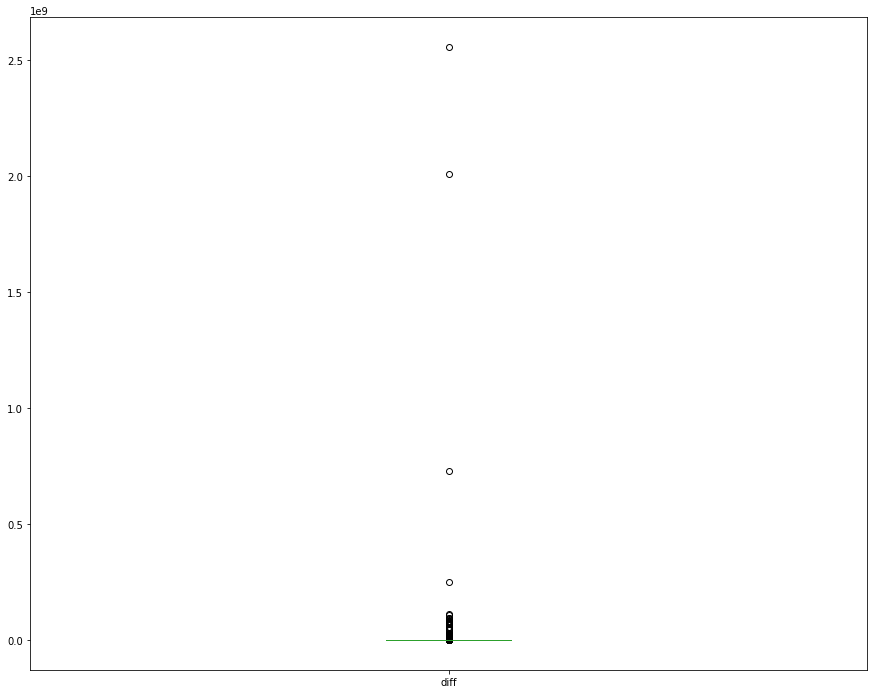

In [25]:
merge_nao_repetidas['diff'].plot(kind='box')

In [26]:
merge_nao_repetidas.groupby('diff').count()['codigoug'].sort_values(ascending=False)

diff
0.00          22517
60000.00         22
100947.00        19
3135500.00       18
426999.23        17
80433.80         17
30000.00         14
1933120.96       13
27000.00         12
70499.86         12
187.30           11
19200.00         11
23000.00         11
12000.00         11
35000.00         10
64400.00         10
42000.00         10
800.00           10
260000.00         9
15000.00          9
498689.81         9
3118500.00        9
288000.00         9
198000.00         9
3185500.00        9
4736000.00        8
50000.00          8
1463161.00        8
395240.00         8
18000.00          8
              ...  
251639.00         1
251657.28         1
251700.00         1
251715.00         1
252048.40         1
252092.70         1
249254.56         1
249254.00         1
249130.42         1
249046.01         1
246000.00         1
246169.11         1
246360.00         1
246378.00         1
246529.68         1
246551.83         1
246700.05         1
246795.74         1
246800.60      

In [27]:
pd.cut(merge_nao_repetidas['diff'],[-1,1000,100000,2.556849e+09],labels=['0-1000', '1000-100000', '>100000']).value_counts()

0-1000         22587
>100000         4400
1000-100000     3685
Name: diff, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11086eb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115475dd8>]], dtype=object)

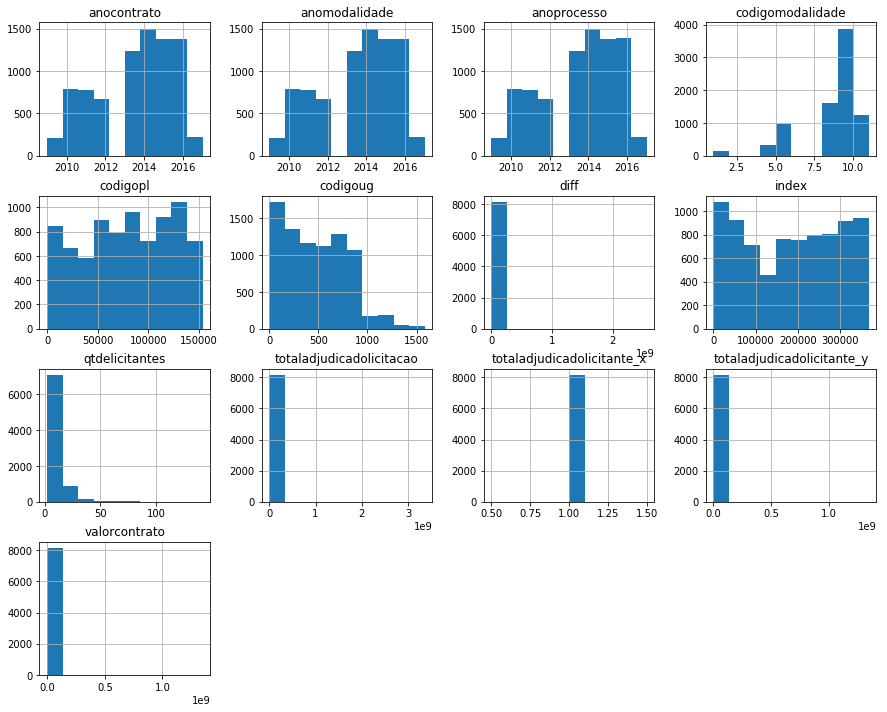

In [28]:
merge_nao_repetidas[merge_nao_repetidas['diff'] > 0].hist()

Com um simples merge, conseguimos 30673 linhas. Isso é 25% da base de contratos.

Duas conclusões:
- O diferença de preço entre a licitação e o contrato é, na mediana 0. O que indica que o preço pode ser usada como uma key para aumentar a porcentagem
- O ano de 2013 não sofreu nenhum merge. Temos que analisar mais profundamente esse caso.


Ano de 2013

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113bb59e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x153f920b8>]], dtype=object)

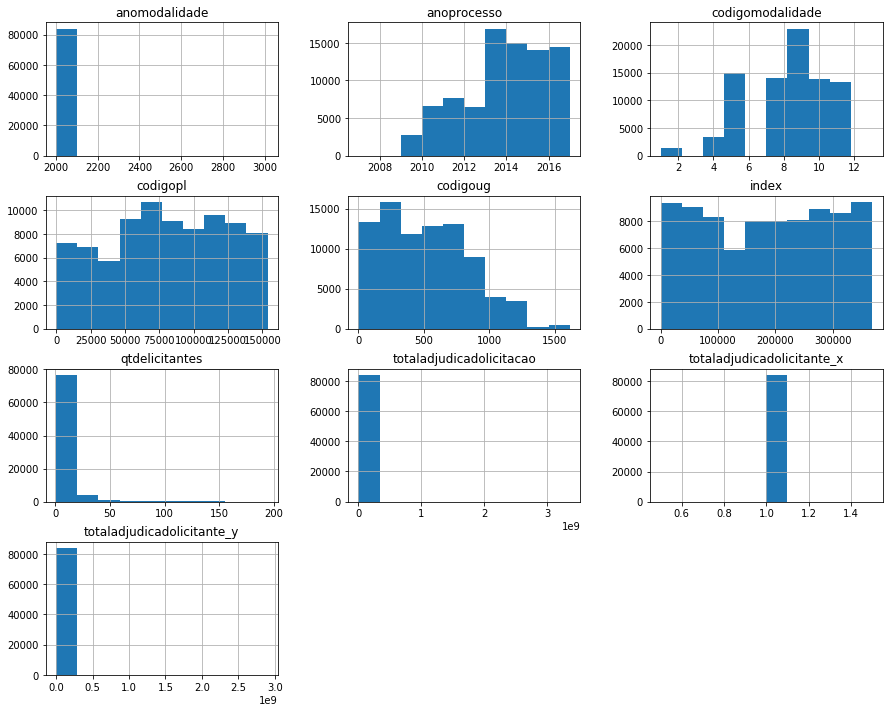

In [29]:
nao_repetidas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15c7a40f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14ada0be0>]], dtype=object)

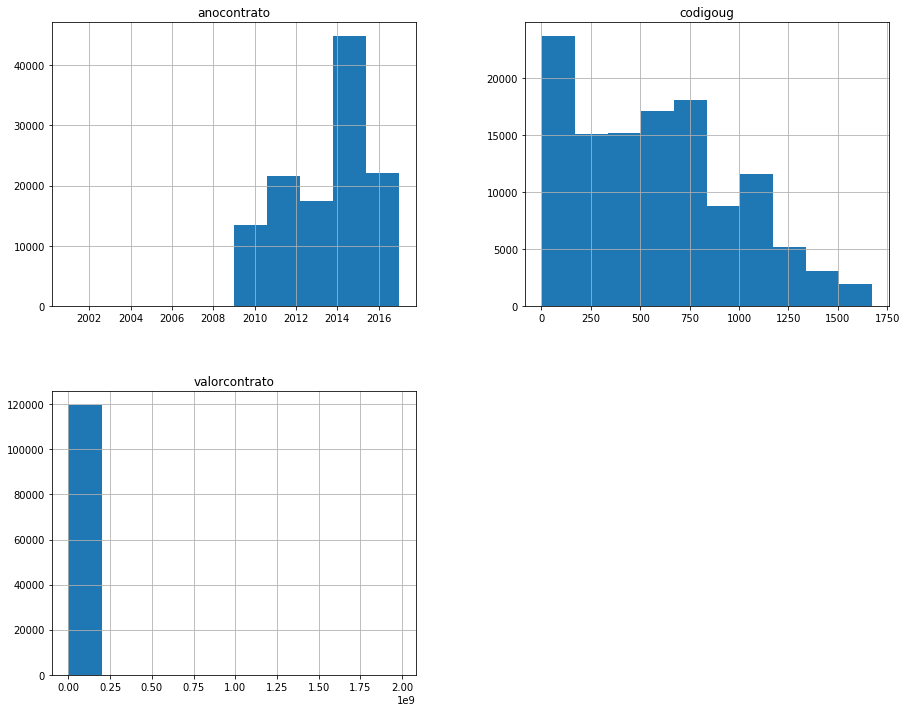

In [30]:
key_contratos[(key_contratos['anocontrato'] < 2018) & (key_contratos['anocontrato'] > 2000)].hist()

In [ ]:
nao_repetidas[nao_repetidas['anomodalidade'] == 2013]

,numerodocumentoajustado,anomodalidade,codigoug,totaladjudicadolicitante_x,index,codigopl,ug,nomenatureza,nomemodalidade,numeromodalidade,descricaoobjeto,especificacaoobjeto,situacaolicitacao,estagiolicitacao,adjudicada,qtdelicitantes,codigomodalidade,numeroprocesso,anoprocesso,caracteristicaobjeto,objetoconformeedital,razaosocial,datapublicacaohomologacao,totaladjudicadolicitacao,resultadohabilitacao,dataemissaoedital,datapublicacaohabilitacao,totaladjudicadolicitante_y
1,11192538000161,2013.0,166.0,1,72952,61513.0,Prefeitura Municipal de Carnaíba,Compras,Convite,5,"MATERIAL DE LIMPEZA, CONSERVAÇÃO E HIGIENE","MATERIAIS DESTINADOS A HIGIENIZAÇÃO PESSOAL, D...",Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,4.0,5.0,12,2013.0,Por Itens,AQUISIÇÃO DE MATERIAL DE LIMPEZA DE USO HOSPIT...,G A INDUSTRIA E COMERCIO DE PRODUTOS DE HIGIEN...,2013-03-11T00:00:00,73495.94,Habilitado,2013-02-27T00:00:00,2013-02-27T00:00:00,9983.94
6,11542111000146,2013.0,232.0,1,92326,73014.0,Prefeitura Municipal de Ferreiros,Outros Serviços,Dispensa,22,LOCAÇÃO DE MÃO-DE-OBRA,"DESPESAS RELATIVAS A MÃO-DE-OBRA, CONSTANTES D...",Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,1.0,10.0,57,2013.0,Integral sem Itens,CONTRATAÇÃO DE PESSOA FISICA OU JURIDICA PARA ...,RITA DE CASSIA LOURENÇO DOS SANTOS - ME,2013-08-14T00:00:00,4000.00,Habilitado,2013-08-08T00:00:00,None,4000.00
12,11563145000117,2013.0,939.0,1,79103,57686.0,Secretaria Executiva de Ressocialização de Per...,Compras,Pregão Eletrônico,16,MEDICAMENTOS,MEDICAMENTOS OU COMPONENTES DESTINADOS À MANIP...,Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,14.0,8.0,31,2013.0,Por Itens,FORNECIMENTO PARCELADO DE MEDICAMENTOS CONTROL...,COMERCIAL MOSTAERT LTDA,2013-10-10T00:00:00,236282.00,Habilitado,2013-07-04T00:00:00,2013-07-31T00:00:00,31400.00
27,11192538000161,2013.0,62.0,1,76663,51750.0,Prefeitura Municipal de Belém de São Francisco,Compras,Convite,5,"MATERIAL DE LIMPEZA, CONSERVAÇÃO E HIGIENE","MATERIAIS DESTINADOS A HIGIENIZAÇÃO PESSOAL, D...",Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,4.0,5.0,5,2013.0,Por Itens,Fornecimento parcelado de Material de Limpeza ...,G A INDUSTRIA E COMERCIO DE PRODUTOS DE HIGIEN...,2013-02-21T00:00:00,24218.40,Habilitado,2013-01-31T00:00:00,2013-02-19T00:00:00,21649.40
32,11429363000163,2013.0,128.0,1,62155,54424.0,Prefeitura Municipal de Cachoeirinha,Compras,Pregão Presencial,8,MATERIAL DE EXPEDIENTE,"MATERIAIS PARA EXPEDIENTE EM GERAL: BORRACHAS,...",Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,2.0,9.0,8,2013.0,Por Lotes,MATERIAL DE EXPEDIENTE,CEMS PAPAIS E CIA LTDA EPP,2013-04-30T00:00:00,40900.00,Habilitado,2013-04-13T00:00:00,2013-04-25T00:00:00,40900.00
39,11447143000162,2013.0,653.0,1,159124,75571.0,Prefeitura Municipal de Tabira,Outros Serviços,Pregão Presencial,19,SERVIÇOS DE CÓPIAS E REPRODUÇÃO DE DOCUMENTOS,SERVIÇOS DE CÓPIAS XEROGRÁFICAS E REPRODUÇÃO D...,Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,1.0,9.0,63,2013.0,Por Itens,sede,PAULO RICARDO FERREIRA BATISTA - ME,2013-11-14T00:00:00,100860.00,Habilitado,2013-10-17T00:00:00,2013-11-06T00:00:00,100860.00
45,11563145000117,2013.0,840.0,1,71632,58507.0,Fundação de Atendimento Socioeducativo,Compras,Pregão Eletrônico,9,MEDICAMENTOS,MEDICAMENTOS OU COMPONENTES DESTINADOS À MANIP...,Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,20.0,8.0,10,2013.0,Por Itens,"Aquisição Parcelada de Medicamentos Clínicos,P...",COMERCIAL MOSTAERT LTDA,2013-04-25T00:00:00,116933.30,Habilitado,2013-03-08T00:00:00,2013-04-25T00:00:00,4316.00
60,11175357000127,2013.0,8.0,1,72364,60500.0,Prefeitura Municipal de Afrânio,Compras,Pregão Presencial,12,GÁS ENGARRAFADO,A AQUISIÇÃO DE GÁS ENGARRAFADO PARA DIVERSOS U...,Concluído,Processo Adjudicado / Homologado / Ratificado,Vencedor,1.0,9.0,22,2013.0,Por Itens,Aquisição de gás de cozinha (GLP),Joaquim Ferreira Cavalcanti,2013-04-09T00:00:00,52020.00,Habilitado,2013-03

In [ ]:
len(key_contratos.merge(nao_repetidas, 
                    left_on=['anocontrato'],
                    right_on=['anomodalidade']))